In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

In [2]:
df_raw = pd.read_excel('C:\\Users\\Hp\\Downloads\\GSE7553.XLSX', sheet_name='Sheet1')

In [3]:
print("Checking missing values:")
print(df_raw.isnull().sum())

Checking missing values:
!Sample_characteristics_ch1    0
Basal cell carcinoma           0
Basal cell carcinoma.1         0
Basal cell carcinoma.2         0
Basal cell carcinoma.3         0
                              ..
Normal Skin.1                  0
Normal Skin.2                  0
Normal Skin.3                  0
Primary Melanoma.12            0
Primary Melanoma.13            0
Length: 88, dtype: int64


In [4]:
df_raw = df_raw.set_index(df_raw.columns[0])

In [5]:
sample_labels = df_raw.columns
y_raw = [label.split('.')[0] for label in sample_labels]

In [6]:
df_transposed = df_raw.transpose()
X = df_transposed.astype(float).values
print("Unique labels:", set(y_raw))

Unique labels: {'Squamous cell carcinoma', 'Melanoma in situ', 'Normal Skin', 'Metastatic Melanoma', 'Primary Melanoma', 'normal human epidermal melanocytes', 'Basal cell carcinoma'}


In [7]:
encoder = LabelEncoder()
y = encoder.fit_transform(y_raw)
y_encoded = to_categorical(y)
num_classes = len(encoder.classes_) 

  Basal cell carcinoma: 15 samples
  Melanoma in situ: 2 samples
  Metastatic Melanoma: 40 samples
  Normal Skin: 4 samples
  Primary Melanoma: 14 samples
  Squamous cell carcinoma: 11 samples
  normal human epidermal melanocytes: 1 samples


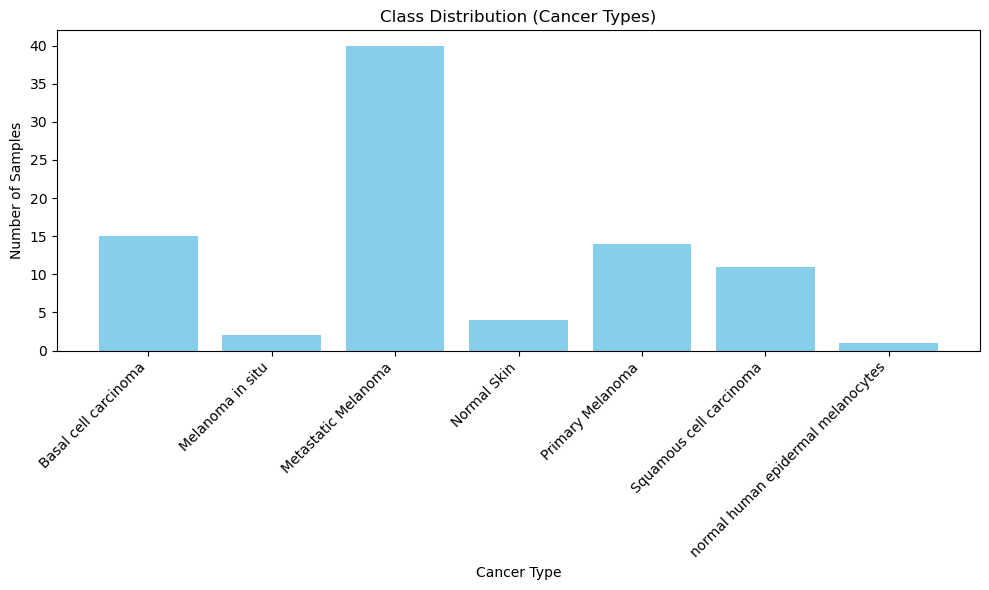

In [8]:
unique, counts = np.unique(y, return_counts=True)

for cls, count in zip(encoder.classes_, counts):
    print(f"  {cls}: {count} samples")

plt.figure(figsize=(10, 6))
plt.bar(encoder.classes_, counts, color='skyblue')
plt.title('Class Distribution (Cancer Types)')
plt.xlabel('Cancer Type')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
print(X_train.shape)

(69, 54675)


In [10]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
checkpoint = ModelCheckpoint('best_gene_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

In [12]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=8,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.2471 - loss: 2.9356
Epoch 1: val_loss improved from inf to 2.88030, saving model to best_gene_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 498ms/step - accuracy: 0.2513 - loss: 2.8936 - val_accuracy: 0.6667 - val_loss: 2.8803
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.4999 - loss: 1.9875
Epoch 2: val_loss improved from 2.88030 to 1.37500, saving model to best_gene_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 375ms/step - accuracy: 0.4992 - loss: 1.9637 - val_accuracy: 0.7222 - val_loss: 1.3750
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5873 - loss: 1.2471
Epoch 3: val_loss improved from 1.37500 to 0.87991, saving model to best_gene_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 399ms/step - accuracy: 0.5866 - loss: 1.2545 - val_accuracy: 0.8333 - val_loss: 0.8799
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.6928 - loss: 0.8214
Epoch 4: val_loss improved from 0.87991 to 0.77510, saving model to best_gene_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 340ms/step - accuracy: 0.6887 - loss: 0.8341 - val_accuracy: 0.8333 - val_loss: 0.7751
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.6973 - loss: 0.9153
Epoch 5: val_loss improved from 0.77510 to 0.69424, saving model to best_gene_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 362ms/step - accuracy: 0.6985 - loss: 0.9128 - val_accuracy: 0.8333 - val_loss: 0.6942
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.6933 - loss: 0.7141
Epoch 6: val_loss improved from 0.69424 to 0.52315, saving model to best_gene_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 395ms/step - accuracy: 0.6965 - loss: 0.7058 - val_accuracy: 0.8889 - val_loss: 0.5232
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8421 - loss: 0.4519
Epoch 7: val_loss did not improve from 0.52315
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.8376 - loss: 0.4563 - val_accuracy: 0.8889 - val_loss: 0.5362
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8596 - loss: 0.3826
Epoch 8: val_loss did not improve from 0.52315
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.8548 - loss: 0.4011 - val_accuracy: 0.8889 - val_loss: 0.6890
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7983 - loss: 0.3780
Epoch 9: val_loss did not improve from 0.52315
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.8011 - loss: 0.3772 - val_accuracy: 0.8333 - val_loss: 0.6387
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9044 - loss: 0.2800
Epoch 10: val_loss did not improve from 0.52315
9/9 ━━━━━━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 369ms/step - accuracy: 0.8929 - loss: 0.3205 - val_accuracy: 0.9444 - val_loss: 0.4269
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9456 - loss: 0.2031
Epoch 15: val_loss did not improve from 0.42686
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.9438 - loss: 0.2055 - val_accuracy: 0.9444 - val_loss: 0.4499
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8808 - loss: 0.4128
Epoch 16: val_loss improved from 0.42686 to 0.39153, saving model to best_gene_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 327ms/step - accuracy: 0.8811 - loss: 0.4141 - val_accuracy: 0.9444 - val_loss: 0.3915
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9231 - loss: 0.2719
Epoch 17: val_loss improved from 0.39153 to 0.36674, saving model to best_gene_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 320ms/step - accuracy: 0.9221 - loss: 0.2730 - val_accuracy: 0.9444 - val_loss: 0.3667
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.8819 - loss: 0.3390
Epoch 18: val_loss did not improve from 0.36674
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.8836 - loss: 0.3370 - val_accuracy: 0.9444 - val_loss: 0.3829
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9523 - loss: 0.2716
Epoch 19: val_loss did not improve from 0.36674
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.9484 - loss: 0.2831 - val_accuracy: 0.8889 - val_loss: 0.3987
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.8702 - loss: 0.3237
Epoch 20: val_loss did not improve from 0.36674
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.8672 - loss: 0.3262 - val_accuracy: 0.8889 - val_loss: 0.4154
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8970 - loss: 0.1936
Epoch 21: val_loss did not improve from 0.36674
9/9 ━━━━

In [15]:
!pip install scikit-fuzzy

   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/920.8 kB ? eta -:--:--
   --------------------- ---------------- 524.3/920.8 kB 882.6 kB/s eta 0:00:01
   --------------------- ---------------- 524.3/920.8 kB 882.6 kB/s eta 0:00:01
   -------------------------------- ----- 786.4/920.8 kB 763.2 kB/s eta 0:00:01
   -------------------------------- ----- 786.4/920.8 kB 763.2 kB/s eta 0:00:01
   -------------------------------------- 920.8/920.8 kB 629.1 kB/s eta 0:00:00


In [36]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# ---------- Load Gene Expression Model ----------
gene_model = load_model('best_gene_model.h5')  # Ensure this matches gene model path

# ---------- Load Gene Data ----------
df_raw = pd.read_excel('C:\\Users\\Hp\\Downloads\\GSE7553.XLSX', sheet_name='Sheet1', index_col=0)
df = df_raw.transpose()
X = df.astype(float).values
y_raw = [label.split('.')[0] for label in df_raw.columns]

encoder = LabelEncoder()
y = encoder.fit_transform(y_raw)
y_encoded = to_categorical(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [37]:
# ---------- Load Image Model ----------
image_model = load_model('best_model.h5')  # Ensure this matches image model path
class_names = sorted([d for d in os.listdir("C:\\Users\\Hp\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train") if os.path.isdir(os.path.join("C:\\Users\\Hp\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train", d))])


In [45]:
def fuzzy_fuse(image_score, gene_score):
    def triangular_membership(x, a, b, c):
        if x <= a or x >= c:
            return 0
        elif a < x <= b:
            return (x - a) / (b - a)
        else:  # b < x < c
            return (c - x) / (c - b)

    def fuzzify_confidence(score):
        return {
            "low": triangular_membership(score, 0.0, 0.2, 0.4),
            "medium": triangular_membership(score, 0.3, 0.5, 0.7),
            "high": triangular_membership(score, 0.6, 0.8, 1.0)
        }

    def apply_rules(image_fuzzy, gene_fuzzy):
        return {
            "low": max(
                min(image_fuzzy["low"], gene_fuzzy["low"]),
                min(image_fuzzy["low"], gene_fuzzy["medium"]),
                min(image_fuzzy["medium"], gene_fuzzy["low"])
            ),
            "medium": max(
                min(image_fuzzy["medium"], gene_fuzzy["medium"]),
                min(image_fuzzy["high"], gene_fuzzy["low"]),
                min(image_fuzzy["low"], gene_fuzzy["high"])
            ),
            "high": max(
                min(image_fuzzy["high"], gene_fuzzy["high"]),
                min(image_fuzzy["medium"], gene_fuzzy["high"]),
                min(image_fuzzy["high"], gene_fuzzy["medium"])
            )
        }

    def defuzzify(rules):
        output_values = {"low": 0.3, "medium": 0.6, "high": 0.9}
        numerator = sum(rules[label] * output_values[label] for label in rules)
        denominator = sum(rules[label] for label in rules)
        return numerator / denominator if denominator != 0 else 0.0

    image_fuzzy = fuzzify_confidence(image_score)
    gene_fuzzy = fuzzify_confidence(gene_score)
    rules = apply_rules(image_fuzzy, gene_fuzzy)
    return defuzzify(rules)


In [ ]:
# ---------- Predict and Fuse ----------
while True:
    try:
        gene_idx = input(f"Enter gene sample index (0 to {X_scaled.shape[0]-1}) or 'exit': ")
        if gene_idx.lower() == 'exit':
            break
        gene_idx = int(gene_idx)
        gene_sample = X_scaled[gene_idx:gene_idx+1]
        gene_pred = gene_model.predict(gene_sample, verbose=0)[0]
        gene_conf = np.max(gene_pred)
        gene_label = encoder.inverse_transform([np.argmax(gene_pred)])[0]

        img_path = input("Enter image path or 'exit': ")
        if img_path.lower() == 'exit':
            break
        img = load_img(img_path, target_size=(180, 180))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        image_pred = image_model.predict(img_array, verbose=0)[0]
        image_conf = np.max(image_pred)
        print("Prediction output of image :", image_pred)
        print("Prediction output of gene :", gene_pred)
        print("Class names:", class_names)
        print("maximum from gene prediction :", np.max(gene_pred))
        print("maximum from image prediction :", np.max(image_pred))

        image_label = class_names[np.argmax(image_pred)]

        fused_conf = fuzzy_fuse(image_conf, gene_conf)

        print(f"\nGene Prediction: {gene_label} (Confidence: {gene_conf:.2f})")
        print(f"Image Prediction: {image_label} (Confidence: {image_conf:.2f})")
        print(f"Fused Confidence Score: {fused_conf:.2f}")

        if image_conf > gene_conf :
            final_decision = image_label
            trusted_model = "image"
        elif gene_conf > image_conf :
            final_decision = gene_label
            trusted_model = "Gene"
        else:
            final_decision = image_label if fused_conf >= 0.75 else gene_label


        if trusted_model == "image":
            print(f"Final Decision: {final_decision} (Image-Based)")
        elif trusted_model == "Gene":
            print(f"Final Decision: {final_decision} (Gene-Based)")
        else:
            print("Ambiguous prediction. Consider further validation.")

    except Exception as e:
        print(f"Error: {e}")
        continue

Enter gene sample index (0 to 86) or 'exit':  0
Enter image path or 'exit':  C:\Users\Hp\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test\basal cell carcinoma\ISIC_0024452.jpg


Prediction output of image : [2.0373383e-28 7.7832592e-30 0.0000000e+00 9.9938583e-01 3.5887936e-16
 3.2483358e-22 6.1410776e-04 0.0000000e+00 0.0000000e+00]
Prediction output of gene : [9.5746541e-01 6.1282595e-03 1.0187777e-07 3.2595319e-03 9.7141281e-04
 3.0349314e-02 1.8259609e-03]
Class names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
maximum from gene prediction : 0.9574654
maximum from image prediction : 0.99938583

Gene Prediction: Basal cell carcinoma (Confidence: 0.96)
Image Prediction: melanoma (Confidence: 1.00)
Fused Confidence Score: 0.90
Final Decision: melanoma (Image-Based)


Enter gene sample index (0 to 86) or 'exit':  1
Enter image path or 'exit':  C:\Users\Hp\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test\basal cell carcinoma\ISIC_0024452.jpg


Prediction output of image : [2.0373383e-28 7.7832592e-30 0.0000000e+00 9.9938583e-01 3.5887936e-16
 3.2483358e-22 6.1410776e-04 0.0000000e+00 0.0000000e+00]
Prediction output of gene : [9.9823785e-01 3.8425476e-04 3.0971197e-08 1.7751273e-04 2.1209102e-05
 8.7795965e-04 3.0121036e-04]
Class names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
maximum from gene prediction : 0.99823785
maximum from image prediction : 0.99938583

Gene Prediction: Basal cell carcinoma (Confidence: 1.00)
Image Prediction: melanoma (Confidence: 1.00)
Fused Confidence Score: 0.90
Final Decision: melanoma (Image-Based)


Enter gene sample index (0 to 86) or 'exit':  2
Enter image path or 'exit':  C:\Users\Hp\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test\basal cell carcinoma\ISIC_0024452.jpg


Prediction output of image : [2.0373383e-28 7.7832592e-30 0.0000000e+00 9.9938583e-01 3.5887936e-16
 3.2483358e-22 6.1410776e-04 0.0000000e+00 0.0000000e+00]
Prediction output of gene : [9.94022071e-01 2.30650228e-04 1.15353433e-08 1.16176154e-04
 2.84936305e-05 4.96205641e-03 6.40616636e-04]
Class names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
maximum from gene prediction : 0.9940221
maximum from image prediction : 0.99938583

Gene Prediction: Basal cell carcinoma (Confidence: 0.99)
Image Prediction: melanoma (Confidence: 1.00)
Fused Confidence Score: 0.90
Final Decision: melanoma (Image-Based)


Enter gene sample index (0 to 86) or 'exit':  C:\Users\Hp\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test\basal cell carcinoma\ISIC_0024345.jpg


Error: invalid literal for int() with base 10: 'C:\\Users\\Hp\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test\\basal cell carcinoma\\ISIC_0024345.jpg'


Enter gene sample index (0 to 86) or 'exit':  2
Enter image path or 'exit':  C:\Users\Hp\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test\basal cell carcinoma\ISIC_0024345.jpg


Prediction output of image : [2.0098928e-28 7.8917447e-30 0.0000000e+00 9.9944144e-01 3.3398398e-16
 3.2869719e-22 5.5853446e-04 0.0000000e+00 0.0000000e+00]
Prediction output of gene : [9.94022071e-01 2.30650228e-04 1.15353433e-08 1.16176154e-04
 2.84936305e-05 4.96205641e-03 6.40616636e-04]
Class names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
maximum from gene prediction : 0.9940221
maximum from image prediction : 0.99944144

Gene Prediction: Basal cell carcinoma (Confidence: 0.99)
Image Prediction: melanoma (Confidence: 1.00)
Fused Confidence Score: 0.90
Final Decision: melanoma (Image-Based)


Enter gene sample index (0 to 86) or 'exit':  6
Enter image path or 'exit':  C:\Users\Hp\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test\melanoma\ISIC_0000043.jpg


Prediction output of image : [2.0287397e-28 7.3605371e-30 0.0000000e+00 9.9942124e-01 3.7874181e-16
 3.6503810e-22 5.7876622e-04 0.0000000e+00 0.0000000e+00]
Prediction output of gene : [1.11145535e-04 1.33206043e-03 1.72223167e-07 2.53315753e-04
 9.98067319e-01 1.15756404e-04 1.20178935e-04]
Class names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
maximum from gene prediction : 0.9980673
maximum from image prediction : 0.99942124

Gene Prediction: Primary Melanoma (Confidence: 1.00)
Image Prediction: melanoma (Confidence: 1.00)
Fused Confidence Score: 0.90
Final Decision: melanoma (Image-Based)
